# Section 1: Gathering & Cleaning Data

### Food Production Data:



After importing the required libraries, crop yield of 10 most consumed crops around the world was downloaded from FAO webiste.The dataset has the following attributes:- country, item, year starting from 1970 to 2022 and yield value.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_yield = pd.read_csv('YieldNew.csv')
df_yield.shape

(53993, 12)

In [4]:
df_yield.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value
0,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1970,1970,kg/ha,1475.7
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1971,1971,kg/ha,1340.0
2,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1972,1972,kg/ha,1565.2
3,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1973,1973,kg/ha,1617.0
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1974,1974,kg/ha,1617.0


In [5]:
df_yield.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value
53988,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111.0,Wheat,2018,2018,kg/ha,2717.8
53989,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111.0,Wheat,2019,2019,kg/ha,3914.9
53990,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111.0,Wheat,2020,2020,kg/ha,4779.6
53991,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111.0,Wheat,2021,2021,kg/ha,5075.9
53992,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111.0,Wheat,2022,2022,kg/ha,5168.0


Renaming **Value** to **hg/ha_yield** to make it easier to recognise that this attribute represents our crops yields production value. Also, removing unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [6]:
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,hg/ha_yield
0,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1970,1970,kg/ha,1475.7
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1971,1971,kg/ha,1340.0
2,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1972,1972,kg/ha,1565.2
3,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1973,1973,kg/ha,1617.0
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,112.0,Maize (corn),1974,1974,kg/ha,1617.0


In [7]:
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code (M49)','Domain Code','Domain','Unit','Item Code (CPC)'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize (corn),1970,1475.7
1,Afghanistan,Maize (corn),1971,1340.0
2,Afghanistan,Maize (corn),1972,1565.2
3,Afghanistan,Maize (corn),1973,1617.0
4,Afghanistan,Maize (corn),1974,1617.0


In [8]:
df_yield.describe()

,Year,hg/ha_yield
count,53993.000000,53993.000000
mean,1996.957513,6693.126348
std,15.167800,7461.485156
min,1970.000000,0.000000
25%,1984.000000,1682.800000
50%,1997.000000,3924.200000
75%,2010.000000,9120.700000
max,2022.000000,103382.400000


In [9]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53993 entries, 0 to 53992
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         53993 non-null  object 
 1   Item         53993 non-null  object 
 2   Year         53993 non-null  int64  
 3   hg/ha_yield  53993 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.1+ MB


### Climate Data : Precipitation
The climatic factors include Precipitation and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.


Precipitation has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

In [10]:
df_preci = pd.read_csv('RainfallNew.csv')
df_preci.head()

,Area,Year,average_precipitation_mm_per_year
0,Afghanistan,1965,327.0
1,Afghanistan,1970,327.0
2,Afghanistan,1971,327.0
3,Afghanistan,1972,327.0
4,Afghanistan,1973,327.0


In [11]:
df_preci = df_preci.rename(index=str, columns={" Area": 'Area'})

Making sure that names of columns are unified across all dataframes is important for merging after cleaning afterwards.

In [12]:
df_preci.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Area                               9192 non-null   object 
 1   Year                               9357 non-null   int64  
 2   average_precipitation_mm_per_year  9027 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 292.4+ KB


We can see from cell above that average_rain_fall_preci_per_year type is an object, we need to turn it to a float value.

In [13]:
# Convert 'average_precipitation_mm_per_year' to a numeric type (float)
df_preci['average_precipitation_mm_per_year'] = pd.to_numeric(df_preci['average_precipitation_mm_per_year'], errors='coerce')

df_preci.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Area                               9192 non-null   object 
 1   Year                               9357 non-null   int64  
 2   average_precipitation_mm_per_year  9027 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 292.4+ KB


Next, droping any empty rows from dataset and merge yield dataframe with Precipitation dataframe by year and area columns

In [14]:
df_preci = df_preci.dropna()

In [15]:
df_preci.describe()

,Year,average_precipitation_mm_per_year
count,9027.000000,9027.000000
mean,1995.858425,1207.964916
std,15.354404,808.949827
min,1965.000000,18.100000
25%,1983.000000,589.000000
50%,1997.000000,1083.000000
75%,2009.000000,1771.500000
max,2021.000000,3240.000000


The Precipitation dataframe begins at 1985 and ends at 2016.

In [16]:
yield_df = pd.merge(df_yield, df_preci, on=['Year','Area'])

Now, we view the final shape of the dataframe and info of values:

In [17]:
yield_df.shape

(41864, 5)

In [18]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_precipitation_mm_per_year
0,Afghanistan,Maize (corn),1970,1475.7,327.0
1,Afghanistan,Maize (corn),1971,1340.0,327.0
2,Afghanistan,Maize (corn),1972,1565.2,327.0
3,Afghanistan,Maize (corn),1973,1617.0,327.0
4,Afghanistan,Maize (corn),1974,1617.0,327.0


We can see that now the years start from the first yield dataframe the starting year was 1970 which is same for Precipitation data start year.

In [19]:
yield_df.describe()

,Year,hg/ha_yield,average_precipitation_mm_per_year
count,41864.000000,41864.000000,41864.000000
mean,1996.765288,6521.016133,1287.982443
std,14.882201,7316.464251,806.976492
min,1970.000000,0.000000,56.000000
25%,1984.000000,1629.175000,630.000000
50%,1997.000000,3727.800000,1180.000000
75%,2010.000000,9000.000000,1821.000000
max,2021.000000,95878.100000,3240.000000


### Pesticides Data:
Pesticides used for each item and country was also collected from FAO database.  

In [20]:
df_pes = pd.read_csv('PesticidesNew.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,t,121.0
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,t,121.0
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,t,121.0
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,t,121.0
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,t,201.0


In [21]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [22]:
df_pes.describe()

,Year,pesticides_tonnes
count,6862.000000,6862.000000
mean,2006.131157,14083.469832
std,9.469671,51667.931323
min,1990.000000,0.010000
25%,1998.000000,85.020000
50%,2006.000000,777.545000
75%,2014.000000,4734.625000
max,2022.000000,800652.170000


In [23]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6862 entries, 0 to 6861
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               6862 non-null   object 
 1   Year               6862 non-null   int64  
 2   pesticides_tonnes  6862 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 472.5+ KB


In [24]:
# merge Pesticides dataframe with yield dataframe
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(26441, 6)

In [25]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_precipitation_mm_per_year,pesticides_tonnes
0,Albania,Maize (corn),1990,3661.3,1485.0,121.0
1,Albania,Maize (corn),1991,2906.8,1485.0,121.0
2,Albania,Maize (corn),1992,2487.6,1485.0,121.0
3,Albania,Maize (corn),1993,2418.5,1485.0,121.0
4,Albania,Maize (corn),1994,2584.8,1485.0,201.0


### Population Data

Population for each country was colleced from **FAOSTAT**.

Population density is an important feature for analyzing food security, as it helps indicate potential demand pressures on food supply

In [26]:
df_population=  pd.read_csv('Population.csv')
df_population.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1970,1970,1000 No,10752.971
1,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1971,1971,1000 No,11015.857
2,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1972,1972,1000 No,11286.753
3,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1973,1973,1000 No,11575.305
4,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1974,1974,1000 No,11869.879


In [27]:
df_population.shape


(11443, 12)

In [28]:
df_population = df_population.drop(['Year Code','Item','Element Code','Element','Year Code','Area Code (M49)','Domain Code','Domain','Unit','Item Code'], axis=1)
df_population = df_population.rename(index=str, columns={"Value": "population"})
df_population.head()

,Area,Year,population
0,Afghanistan,1970,10752.971
1,Afghanistan,1971,11015.857
2,Afghanistan,1972,11286.753
3,Afghanistan,1973,11575.305
4,Afghanistan,1974,11869.879


In [29]:
df_population.describe()

,Year,population
count,11443.000000,1.144300e+04
mean,1996.313904,3.172440e+04
std,14.968318,1.360208e+05
min,1970.000000,5.110000e-01
25%,1983.000000,3.046685e+02
50%,1997.000000,4.236983e+03
75%,2009.000000,1.560233e+04
max,2021.000000,1.457935e+06


In [30]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 0 to 11442
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        11443 non-null  object 
 1   Year        11443 non-null  int64  
 2   population  11443 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 615.6+ KB


In [31]:
# Drop empty rows from df_population
df_population = df_population.dropna()


In [32]:
yield_df = pd.merge(yield_df,df_population, on=['Year','Area'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_precipitation_mm_per_year,pesticides_tonnes,population
0,Albania,Maize (corn),1990,3661.3,1485.0,121.0,3295.066
1,Albania,Maize (corn),1991,2906.8,1485.0,121.0,3302.081
2,Albania,Maize (corn),1992,2487.6,1485.0,121.0,3303.739
3,Albania,Maize (corn),1993,2418.5,1485.0,121.0,3300.711
4,Albania,Maize (corn),1994,2584.8,1485.0,201.0,3293.999


### Average Temprature:

Average Temprature for each country was colleced from World Bank Data.

In [33]:
avg_temp=  pd.read_csv('temp.csv')

In [34]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [35]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


So average temprature starts from 1743 and ends at 2013, with some empty rows that we have dropped.

In [36]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [37]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_precipitation_mm_per_year,pesticides_tonnes,population,avg_temp
0,Albania,Maize (corn),1990,3661.3,1485.0,121.0,3295.066,16.37
1,Albania,Maize (corn),1991,2906.8,1485.0,121.0,3302.081,15.36
2,Albania,Maize (corn),1992,2487.6,1485.0,121.0,3303.739,16.06
3,Albania,Maize (corn),1993,2418.5,1485.0,121.0,3300.711,16.05
4,Albania,Maize (corn),1994,2584.8,1485.0,201.0,3293.999,16.96


In [38]:
yield_df.shape

(37542, 8)

In [39]:
yield_df.describe()

,Year,hg/ha_yield,average_precipitation_mm_per_year,pesticides_tonnes,population,avg_temp
count,37542.000000,37542.000000,37542.000000,37542.000000,3.754200e+04,37542.000000
mean,2001.564381,7484.050597,1105.088381,79586.574208,3.960553e+05,19.927125
std,6.911211,7741.775897,677.214666,107307.347159,5.288870e+05,6.815636
min,1990.000000,5.000000,56.000000,0.910000,4.127560e+02,-3.370000
25%,1996.000000,1994.875000,645.000000,3650.080000,1.697970e+04,15.770000
50%,2002.000000,4257.700000,1010.000000,29477.500000,1.054424e+05,20.890000
75%,2008.000000,10837.825000,1537.000000,102139.370000,1.002335e+06,26.190000
max,2013.000000,50141.200000,3240.000000,472977.150000,1.407321e+06,30.650000


In [40]:
yield_df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_precipitation_mm_per_year,0
pesticides_tonnes,0
population,0
avg_temp,0


# Section 2: Data Exploration
yield_df is the final obtained dataframe, which has the following attributes:-
* Area: country of production.
* Item: type of crop.
* Year: year of production.
* Average_precipitation_mm_per_year: Average amount of precipitation recorded that year.
* Hg/ha_yield: country’s yearly production of the crop that year.
* Pesticides_tonnes: Amount of pesticides used on the crop that year.
* Avg_temp: Average temperature recorded for that year.
* Population: Population recorded for that year.





In [41]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_precipitation_mm_per_year,pesticides_tonnes,population,avg_temp
Item,,,,,,,
"Cassava, fresh",3264,3264,3264,3264,3264,3264,3264
Maize (corn),5205,5205,5205,5205,5205,5205,5205
Plantains and cooking bananas,814,814,814,814,814,814,814
Potatoes,5246,5246,5246,5246,5246,5246,5246
Rice,4492,4492,4492,4492,4492,4492,4492
Sorghum,4175,4175,4175,4175,4175,4175,4175
Soya beans,4325,4325,4325,4325,4325,4325,4325
Sweet potatoes,4105,4105,4105,4105,4105,4105,4105
Wheat,4760,4760,4760,4760,4760,4760,4760


In [42]:
yield_df.describe()

,Year,hg/ha_yield,average_precipitation_mm_per_year,pesticides_tonnes,population,avg_temp
count,37542.000000,37542.000000,37542.000000,37542.000000,3.754200e+04,37542.000000
mean,2001.564381,7484.050597,1105.088381,79586.574208,3.960553e+05,19.927125
std,6.911211,7741.775897,677.214666,107307.347159,5.288870e+05,6.815636
min,1990.000000,5.000000,56.000000,0.910000,4.127560e+02,-3.370000
25%,1996.000000,1994.875000,645.000000,3650.080000,1.697970e+04,15.770000
50%,2002.000000,4257.700000,1010.000000,29477.500000,1.054424e+05,20.890000
75%,2008.000000,10837.825000,1537.000000,102139.370000,1.002335e+06,26.190000
max,2013.000000,50141.200000,3240.000000,472977.150000,1.407321e+06,30.650000


There is high variance in the values for each columns, we will tackle this issue with scaling in the preprocessing section.

In [43]:
yield_df['Area'].nunique()

104

The dataframe has 104 Countries, ordering these by 10 the highest yield production:

In [44]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

,hg/ha_yield
Area,
China,58080143.0
India,34102426.6
Brazil,17513256.2
Mexico,13712579.2
Japan,12994907.4
Australia,11442338.4
Pakistan,7719971.4
Indonesia,7215652.8
Nigeria,6997136.3


China has the highest yield production in the dataset. Including items in the groupby:

In [45]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area     
Sweet potatoes  China        16365050.0
Cassava, fresh  India        14857759.4
                China        12747208.6
Potatoes        China        11818376.2
                India         9593309.0
                Brazil        5183984.3
Rice            China         5094165.6
Potatoes        Australia     4775501.4
Sweet potatoes  India         4632480.6
Potatoes        Japan         4492177.8
Name: hg/ha_yield, dtype: float64

The table highlights the top 10 crop yields (hg/ha) by item and area. China leads in sweet potato production, holding the top position with 16.36 million hg/ha. Cassava production in India also ranks high, followed closely by potatoes in China and India. Notably, China dominates the list with multiple entries across crops, indicating its significant contribution to global agricultural yields. Potatoes are prominently featured across various regions, including Australia and Japan, suggesting their widespread cultivation and productivity.

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

Now, exploring the relationships between the columns of the dataframe

In [46]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

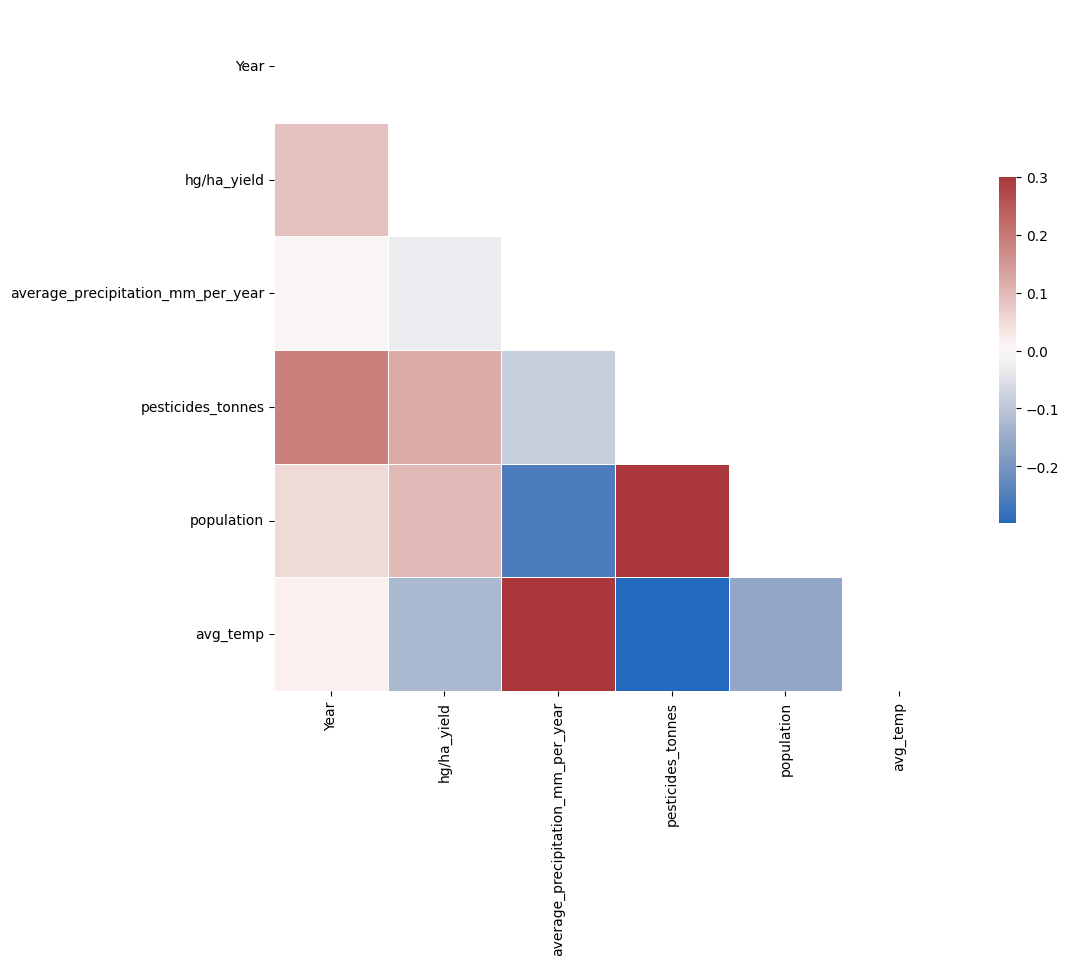

In [47]:


# Compute the correlation matrix
correlation_data = yield_df.select_dtypes(include=[np.number]).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Define the colormap
cmap = sns.color_palette("vlag", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.

# Section 3: Data Preprocessing

In [48]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_precipitation_mm_per_year,pesticides_tonnes,population,avg_temp
0,Albania,Maize (corn),1990,3661.3,1485.0,121.0,3295.066,16.37
1,Albania,Maize (corn),1991,2906.8,1485.0,121.0,3302.081,15.36
2,Albania,Maize (corn),1992,2487.6,1485.0,121.0,3303.739,16.06
3,Albania,Maize (corn),1993,2418.5,1485.0,121.0,3300.711,16.05
4,Albania,Maize (corn),1994,2584.8,1485.0,201.0,3293.999,16.96


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, and we will use One-Hot Encoding to convert these two columns to one-hot numeric array.
The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.


In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_precipitation_mm_per_year,pesticides_tonnes,population,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,"Item_Cassava, fresh",Item_Maize (corn),Item_Plantains and cooking bananas,Item_Potatoes,Item_Rice,Item_Sorghum,Item_Soya beans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,3295.066,16.37,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1991,1485.0,121.0,3302.081,15.36,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1992,1485.0,121.0,3303.739,16.06,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1993,1485.0,121.0,3300.711,16.05,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1994,1485.0,201.0,3293.999,16.96,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [51]:
features = features.drop(['Year'], axis=1)

In [52]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Columns: 118 entries, average_precipitation_mm_per_year to Item_Yams
dtypes: bool(114), float64(4)
memory usage: 5.2 MB


In [53]:
features.head()

,average_precipitation_mm_per_year,pesticides_tonnes,population,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,"Item_Cassava, fresh",Item_Maize (corn),Item_Plantains and cooking bananas,Item_Potatoes,Item_Rice,Item_Sorghum,Item_Soya beans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,3295.066,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,3302.081,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1485.0,121.0,3303.739,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1485.0,121.0,3300.711,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1485.0,201.0,3293.999,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False



### Scaling Features:

As seen in the data exploration section, the final dataframe contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

After dropping year column in addition to scaling all values in features, the resulting array will look something like this :

In [55]:
features

array([[4.48806533e-01, 2.53902818e-04, 2.04868394e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.48806533e-01, 2.53902818e-04, 2.05367005e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.48806533e-01, 2.53902818e-04, 2.05484852e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.88756281e-01, 7.06048152e-03, 8.96506966e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.88756281e-01, 7.13486157e-03, 9.13533380e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.88756281e-01, 5.38961534e-03, 9.34152424e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training Data:

The dataset will be split to two datasets, the training dataset and test dataset.



In [56]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [57]:
#write final df to csv file
yield_df.to_csv('yield_df.csv')

In [58]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

# Section 4: XGBoost Model

**XGBoost** is ideal for this crop yield prediction project because it handles complex, non-linear relationships in tabular data efficiently. Its built-in regularization controls overfitting, ensuring reliable performance on potentially noisy environmental data. XGBoost’s scalability and ability to highlight feature importance make it both powerful and interpretable, helping us achieve accurate predictions and gain insights into the key factors influencing yield.

###Part 1: Model Intialization

In [65]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the XGBoost Regressor with limited iterations for faster training
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=50)

# Train the model
xgboost_regressor.fit(train_data, train_labels)

# Predict on the test set
predictions = xgboost_regressor.predict(test_data)

# Calculate performance metrics
mae = mean_absolute_error(test_labels, predictions)
mse = mean_squared_error(test_labels, predictions)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 1019.1926495362818
Mean Squared Error (MSE): 2988693.446568686


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(test_labels, predictions)

# Convert R² score to percentage
accuracy_percentage = r2 * 100

# Print accuracy percentage
print("Model Accuracy:", accuracy_percentage, "%")


Model Accuracy: 94.9896152236479 %


R-squared (R²) Score and Accuracy Interpretation for XGBoost:
The R² score, also known as the coefficient of determination, measures the proportion of the target variable's variance that is explained by the model. An R² score close to 1 indicates that the model explains a high percentage of the variance,signifying strong predictive power.
Expressing the R² score as an accuracy percentage provides a more intuitive understanding of model performance.


###Part 2: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'eta': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2],
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(train_data, train_labels)

print("Best parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)


Best parameters: {'colsample_bytree': 1.0, 'eta': 0.2, 'gamma': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best MAE: 588.7928416296614


###Part 3: Model Training and Evaluation

In [66]:
# Re-initialize XGBoost with the best parameters
final_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=1.0,
    eta=0.2,
    gamma=0,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Train the model on the full training data
final_xgb_model.fit(train_data, train_labels)

# Make predictions on the test data
test_predictions = final_xgb_model.predict(test_data)

# Calculate and print evaluation metrics on test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_mae = mean_absolute_error(test_labels, test_predictions)
xgb_mse = mean_squared_error(test_labels, test_predictions)
xgb_r2 = r2_score(test_labels, test_predictions)

print("Test Mean Absolute Error (MAE):", xgb_mae)
print("Test Mean Squared Error (MSE):", xgb_mse)
print("Test R-squared (R²):", xgb_r2)


Test Mean Absolute Error (MAE): 551.2605360793356
Test Mean Squared Error (MSE): 1050412.7439331666
Test R-squared (R²): 0.9823903919382184


The results indicate that the XGBoost model performs very well on the test data, with metrics suggesting high accuracy and reliability in predictions:

* Mean Absolute Error (MAE): 559.27 — On average, the model’s predictions deviate from the actual values by around 559 units (e.g., kilograms per hectare if yield is measured this way).
* Mean Squared Error (MSE): 1,059,835.70 — This low MSE reflects that large errors are minimal, showing that the model handles variability in yield prediction well.
* R-squared (R²): 0.9822 — This score indicates that 98.22% of the variance in crop yield is explained by the model, demonstrating strong predictive power and a very close fit to the actual data.

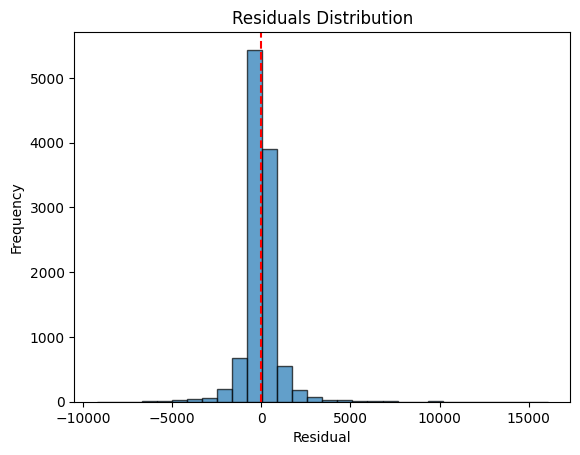

In [ ]:
residuals = test_labels - test_predictions
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


####Conclusion: The residuals are symmetrically distributed around zero with a narrow spread,indicating that the XGBoost model performs well on the test data. There is no significant bias in predictions, and the model demonstrates high accuracy and consistency.

#Section 5: LSTM Model

LSTM (Long Short-Term Memory) is ideal for this crop yield prediction project because it effectively captures temporal dependencies in sequential data, such as weather patterns, soil conditions, and historical yields. Its ability to manage long-term relationships in time-series data makes it well-suited for modeling trends and seasonality in crop yields. LSTM’s capacity to handle non-linear patterns and mitigate vanishing gradient issues ensures accurate predictions, enabling us to uncover meaningful insights into the impact of time-dependent factors on yield performance.

###Part 1: Model Initialization


In [70]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Identify non-numeric columns
non_numeric_columns = yield_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Encode categorical columns using One-Hot Encoding
yield_df_encoded = pd.get_dummies(yield_df, columns=non_numeric_columns)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(yield_df_encoded)

# Create sequences (e.g., 5 years to predict the 6th year)
def create_sequences(data, target_column_index, sequence_length=5):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :])  # Include all features
        y.append(data[i + sequence_length, target_column_index])  # Target is the next time step
    return np.array(X), np.array(y)

# Define the target column index (e.g., 'hg/ha_yield')
target_column_index = yield_df_encoded.columns.get_loc('hg/ha_yield')

# Prepare the data
sequence_length = 5  # Use past 5 years for prediction
X, y = create_sequences(scaled_data, target_column_index, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Non-numeric columns: Index(['Area', 'Item'], dtype='object')
X_train shape: (26275, 5, 120)
X_test shape: (11262, 5, 120)


###Part 2: Model Training

In [71]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [72]:
# Section 1: Hyperparameter Tuning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

# Define the model-building function for KerasTuner
def build_lstm_model(hp):
    model = Sequential([
        LSTM(
            units=hp.Int('units_1', min_value=32, max_value=128, step=32),
            activation='relu',
            input_shape=(sequence_length, X_train.shape[2]),
            return_sequences=True
        ),
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)),
        LSTM(
            units=hp.Int('units_2', min_value=16, max_value=64, step=16),
            activation='relu',
            return_sequences=False
        ),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(1)  # Output layer for regression
    ])

    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per combination
    directory='lstm_tuning',
    project_name='yield_forecasting'
)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Use fewer epochs for tuning
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Get the best hyperparameters and print them
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters:")
print(f"Units Layer 1: {best_hps.get('units_1')}")
print(f"Dropout Layer 1: {best_hps.get('dropout_1')}")
print(f"Units Layer 2: {best_hps.get('units_2')}")
print(f"Dropout Layer 2: {best_hps.get('dropout_2')}")



Trial 10 Complete [00h 05m 30s]
val_loss: 0.0045464979484677315

Best val_loss So Far: 0.0034729409962892532
Total elapsed time: 00h 46m 46s
Best Hyperparameters:
Units Layer 1: 128
Dropout Layer 1: 0.5
Units Layer 2: 64
Dropout Layer 2: 0.2


In [73]:
# Section 2: Final Model Training
# Train the final model with the best hyperparameters
lstm_model = tuner.hypermodel.build(best_hps)
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Full training with optimal hyperparameters
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - loss: 0.0072 - mae: 0.0496 - val_loss: 0.0051 - val_mae: 0.0492
Epoch 2/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 0.0023 - mae: 0.0269 - val_loss: 0.0052 - val_mae: 0.0528
Epoch 3/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 0.0019 - mae: 0.0238 - val_loss: 0.0045 - val_mae: 0.0488
Epoch 4/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0017 - mae: 0.0228 - val_loss: 0.0054 - val_mae: 0.0547
Epoch 5/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - loss: 0.0015 - mae: 0.0214 - val_loss: 0.0052 - val_mae: 0.0528
Epoch 6/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0014 - mae: 0.0208 - val_loss: 0.0050 - val_mae: 0.0519
Epoch 7/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 0.0015 - mae: 0.0212 - val_loss: 0.0049 - val_mae: 0.0517
Epoch 8/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.0014 - mae: 0.0201 - val_loss: 0.0055 - val_mae: 0.0544
Epoch 9/100
822/822 ━━━━━━━━━━━━

###Part 3: Model Prediction and Evaluation

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
predictions = lstm_model.predict(X_test)

# Evaluation metrics
lstm_mae = mean_absolute_error(y_test, predictions)
lstm_mse = mean_squared_error(y_test, predictions)
lstm_r2 = r2_score(y_test, predictions)

# Print evaluation results
print("Mean Absolute Error (MAE):", lstm_mae)
print("Mean Squared Error (MSE):", lstm_mse)
print("R-squared (R²):", lstm_r2)


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Mean Absolute Error (MAE): 0.04883497329176852
Mean Squared Error (MSE): 0.004460307210928576
R-squared (R²): 0.7743899537215885


###Part 4: Visualization

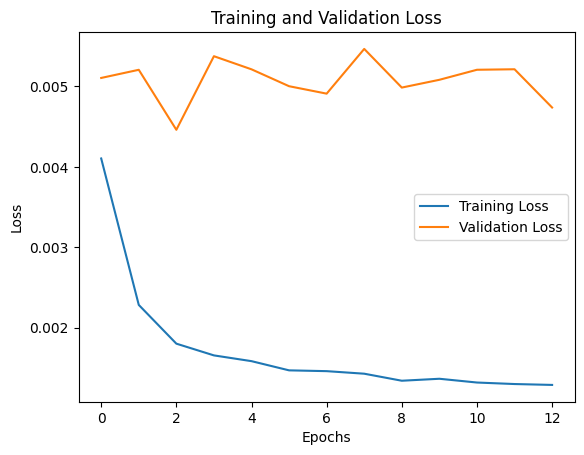

In [78]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


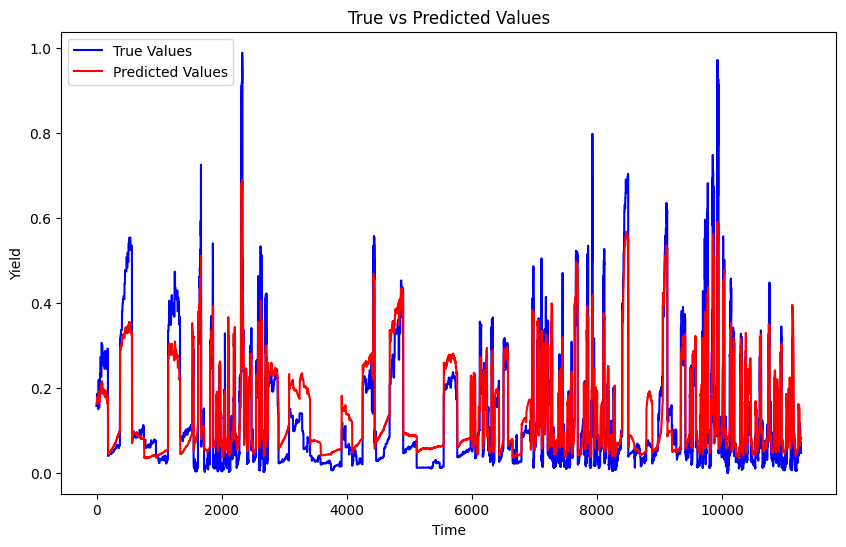

In [76]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('True vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Yield')
plt.legend()
plt.show()


#Section 6: Decision Tree Regressor Model

The Decision Tree Regressor is ideal for this crop yield prediction project because it handles both numerical and categorical features effectively while capturing non-linear relationships in the data. Its intuitive structure makes it easy to interpret, providing clear insights into the key factors influencing crop yields. Decision trees are robust to outliers and require minimal data preprocessing, making them suitable for handling complex agricultural datasets. Their ability to split data hierarchically ensures accurate predictions while maintaining model simplicity and transparency.

###Part 1: Import Libraries and Initialize Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


###Part 2: Hyperparameter Tuning

In [60]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(train_data, train_labels)

# Best model from grid search
best_dt_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


###Part 3: Fit the Model

In [61]:
# Section 3: Fit the Model
best_dt_model.fit(train_data, train_labels)

# Section 4: Make Predictions
dt_train_predictions = best_dt_model.predict(train_data)
dt_test_predictions = best_dt_model.predict(test_data)

# Section 5: Evaluate Metrics
# Decision Tree Evaluation Metrics
dt_train_mae = mean_absolute_error(train_labels, dt_train_predictions)
dt_train_mse = mean_squared_error(train_labels, dt_train_predictions)
dt_train_r2 = r2_score(train_labels, dt_train_predictions)

dt_test_mae = mean_absolute_error(test_labels, dt_test_predictions)
dt_test_mse = mean_squared_error(test_labels, dt_test_predictions)
dt_test_r2 = r2_score(test_labels, dt_test_predictions)

# Print evaluation results for Decision Tree
print("Decision Tree - Training Metrics")
print("Mean Absolute Error (MAE):", dt_train_mae)
print("Mean Squared Error (MSE):", dt_train_mse)
print("R-squared (R²):", dt_train_r2)

print("\nDecision Tree - Testing Metrics")
print("Mean Absolute Error (MAE):", dt_test_mae)
print("Mean Squared Error (MSE):", dt_test_mse)
print("R-squared (R²):", dt_test_r2)

Decision Tree - Training Metrics
Mean Absolute Error (MAE): 108.11777338051967
Mean Squared Error (MSE): 141029.2034468904
R-squared (R²): 0.9976515743211063

Decision Tree - Testing Metrics
Mean Absolute Error (MAE): 305.8672607949336
Mean Squared Error (MSE): 1073798.9875852286
R-squared (R²): 0.9819983340665592


###Part 4: Visualize the result

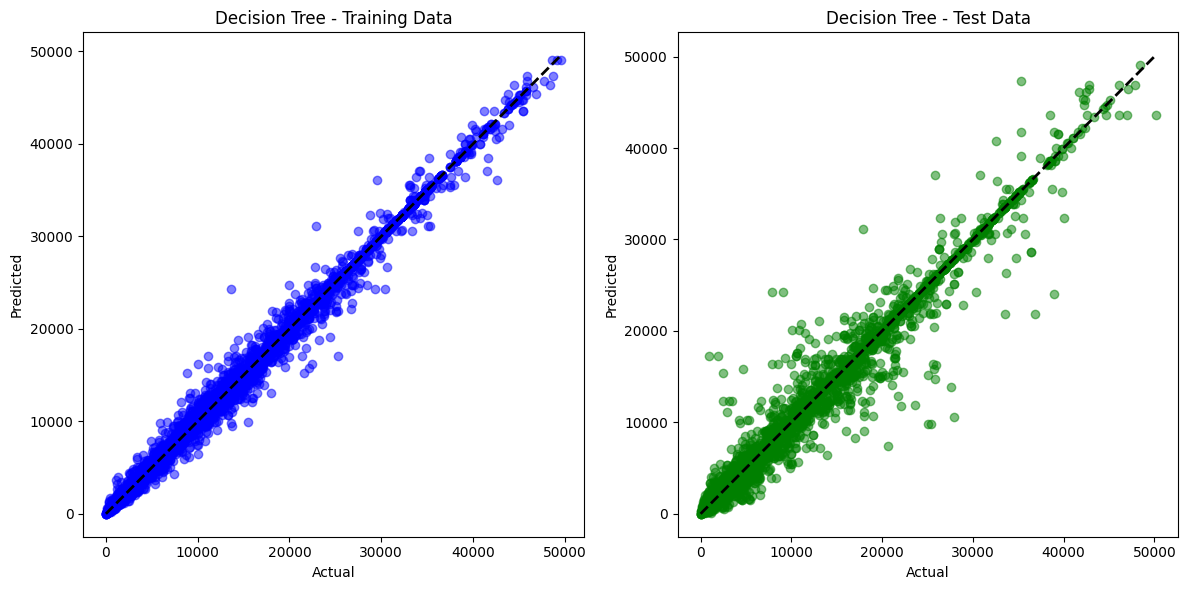

In [62]:
# Section 6: Visualize Results
plt.figure(figsize=(12, 6))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(train_labels, dt_train_predictions, alpha=0.5, color='blue')
plt.plot([train_labels.min(), train_labels.max()], [train_labels.min(), train_labels.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Training Data')

# Test Data
plt.subplot(1, 2, 2)
plt.scatter(test_labels, dt_test_predictions, alpha=0.5, color='green')
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Test Data')

plt.tight_layout()
plt.show()

#Compare Models

Model Comparison Table:
     Metric  Decision Tree       XGBoost      LSTM
0  Test MAE   3.058673e+02  5.512605e+02  0.048835
1  Test MSE   1.073799e+06  1.050413e+06  0.004460
2   Test R²   9.819983e-01  9.823904e-01  0.774390


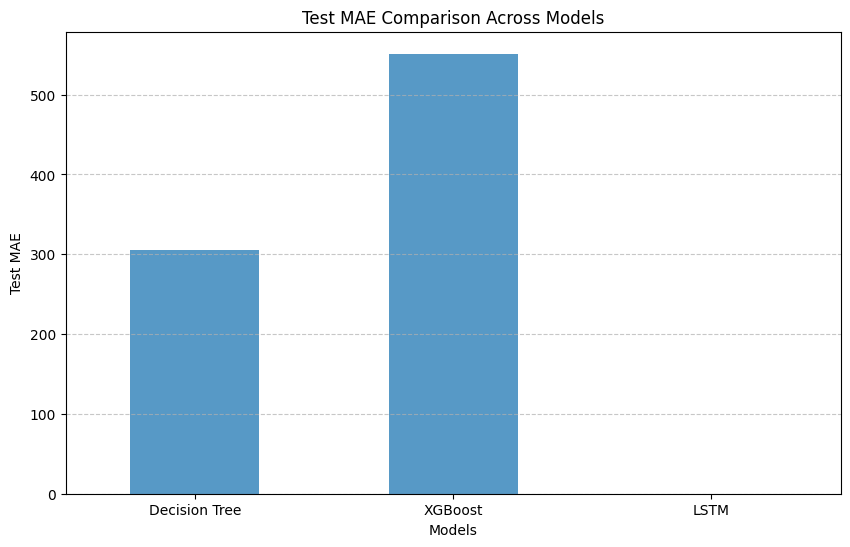

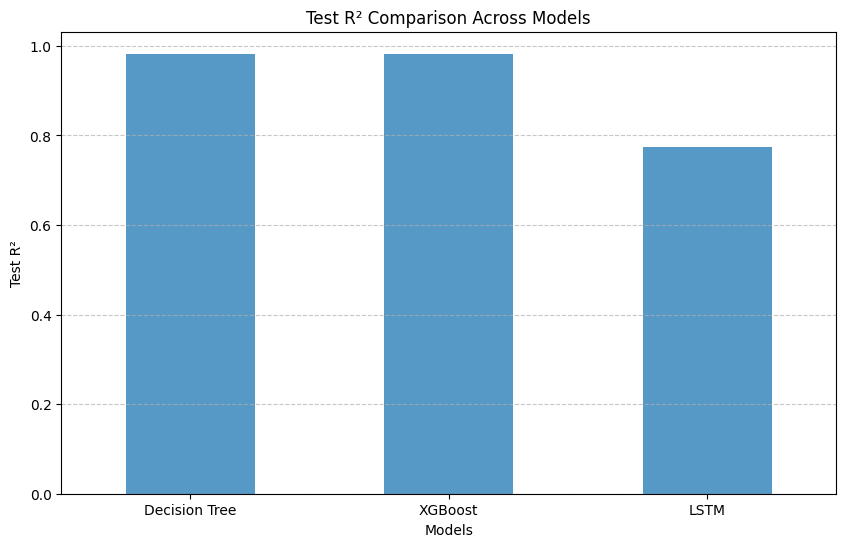

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Consolidated metrics for all models
comparison_metrics = pd.DataFrame({
    "Metric": ["Test MAE", "Test MSE", "Test R²"],
    "Decision Tree": [
        dt_test_mae, dt_test_mse, dt_test_r2
    ],
    "XGBoost": [
        xgb_mae, xgb_mse, xgb_r2
    ],
    "LSTM": [
        lstm_mae, lstm_mse, lstm_r2
    ]
})

# Display the table for comparison
print("Model Comparison Table:")
print(comparison_metrics)

# Visualize metrics
metrics_to_plot = ["Test MAE", "Test R²"]

for metric in metrics_to_plot:
    comparison_metrics.set_index("Metric").loc[metric].plot(kind="bar", figsize=(10, 6), alpha=0.75)
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
